<a href="https://colab.research.google.com/github/educhile1/challenge_datascience1-ONE/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [2]:
import pandas as pd
import matplotlib.pyplot  as plt
import seaborn as sns
import plotly.graph_objects as go

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"



#SELECCIONA LOS MINIMOS Y LOS PONE EN ROJO LOS DEMAS EN VERDE
def color_minimo_otros_verde(col):
    min_val = col.min()
    return ['background-color: lightcoral' if v == min_val else 'background-color: green' for v in col]


#SELECCIONA LOS Maximos Y LOS PONE EN ROJO LOS DEMAS EN VERDE
def color_maximo_otros_verde(col):
    max_val = col.max()
    return ['background-color: lightcoral' if v == max_val else 'background-color: green' for v in col]

#Genera Resumenes de factuaración, costos envios, ganancia y nombre de tienda
def resumen_por_mes(df_tienda, nombre_tienda):
    agrupado = df_tienda.groupby(['anho-mes'])
    data = []
    for nombre, grupo_df in agrupado:
        countsFact = grupo_df['Precio']
        countsCosto = grupo_df['Costo de envío']
        countsGanancia = countsFact - countsCosto
        data.append({
            "Grupo": nombre,
            "Facturado": countsFact.sum(),
            "CostoEnvio": countsCosto.sum(),
            "Ganancia": countsGanancia.sum(),
            "Tienda": nombre_tienda
        })
    return pd.DataFrame(data)



tienda = pd.read_csv(url)
#display(tienda.info())
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)
#tienda.head()
dataTienda1= pd.DataFrame(tienda)
dataTiendaClear= dataTienda1.drop(columns=['Cantidad de cuotas', 'lat', 'lon', 'Método de pago', 'Fecha de Compra','Vendedor','Lugar de Compra']).sort_values(by='Producto', ascending=True)
tienda['anho-mes'] = pd.to_datetime(tienda['Fecha de Compra'], format='%d/%m/%Y').dt.strftime('%Y-%m') # Convertir a tipo de dato fecha
tienda2['anho-mes'] = pd.to_datetime(tienda2['Fecha de Compra'], format='%d/%m/%Y').dt.strftime('%Y-%m') # Convertir a tipo de dato fecha
tienda3[  'anho-mes'] = pd.to_datetime(tienda3['Fecha de Compra'], format='%d/%m/%Y').dt.strftime('%Y-%m') # Convertir a tipo de dato fecha
tienda4['anho-mes'] = pd.to_datetime(tienda4['Fecha de Compra'], format='%d/%m/%Y').dt.strftime('%Y-%m') # Convertir a tipo de dato fecha
#display(tienda['anho'])
#display(tienda)





dataTienda2= pd.DataFrame(tienda2)
dataTienda2Clear= dataTienda2.drop(columns=['Cantidad de cuotas', 'lat', 'lon', 'Método de pago', 'Fecha de Compra','Vendedor','Lugar de Compra', 'Calificación']).sort_values(by='Producto', ascending=True)

dataTienda3= pd.DataFrame(tienda3)
dataTienda3Clear= dataTienda3.drop(columns=['Cantidad de cuotas', 'lat', 'lon', 'Método de pago', 'Fecha de Compra','Vendedor','Lugar de Compra', 'Calificación']).sort_values(by='Producto', ascending=True)


dataTienda4= pd.DataFrame(tienda4)
dataTienda4Clear= dataTienda4.drop(columns=['Cantidad de cuotas', 'lat', 'lon', 'Método de pago', 'Fecha de Compra','Vendedor','Lugar de Compra', 'Calificación']).sort_values(by='Producto', ascending=True)


#1. Análisis de facturación



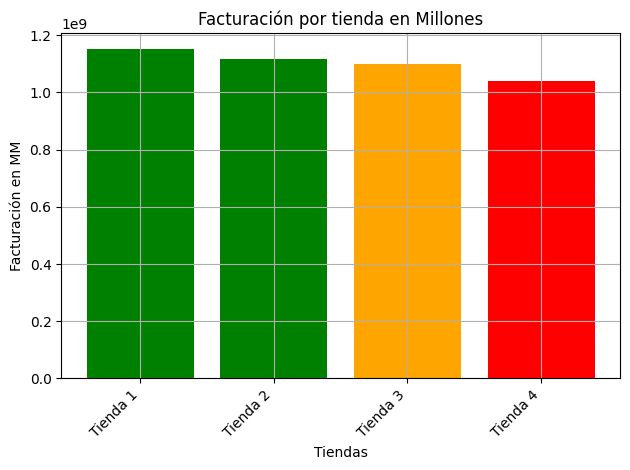

In [3]:
factTienda1= dataTienda1['Precio'].sum()
factTienda2= dataTienda2['Precio'].sum()
factTienda3= dataTienda3['Precio'].sum()
factTienda4= dataTienda4['Precio'].sum()

tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
facturas = [factTienda1, factTienda2, factTienda3, factTienda4]
colores=['green', 'green', 'orange', 'red']

plt.bar(tiendas, facturas, color=colores)
plt.xlabel('Tiendas')
plt.ylabel('Facturación en MM')
plt.title("Facturación por tienda en Millones")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid()



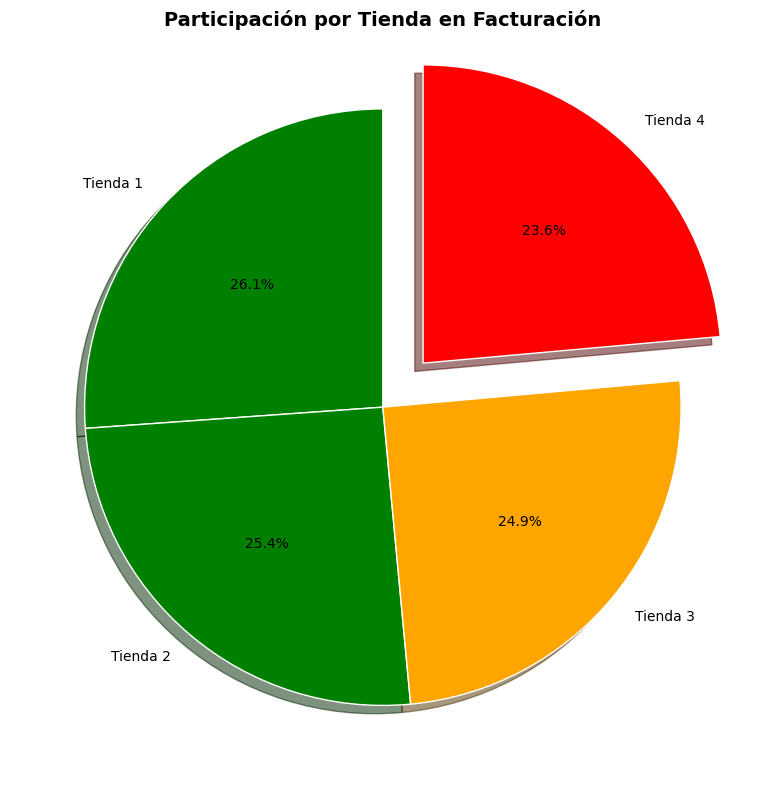

In [7]:

tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
facturas = [factTienda1, factTienda2, factTienda3, factTienda4]
colores=['green', 'green', 'orange', 'red']
separacion = [0, 0, 0, 0.2]

plt.figure(figsize=(8, 8))  # Tamaño más amigable
plt.pie(
    facturas,
    labels=tiendas,
    explode=separacion,
    colors=colores,
    shadow=True,
    autopct='%1.1f%%',  # Muestra el porcentaje con un decimal
    startangle=90,     # Rotación para mejor distribución visual
    wedgeprops={'edgecolor': 'white'}  # Borde blanco para más claridad
)
plt.title("Participación por Tienda en Facturación", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

np.float64(1150880400.0)

np.float64(1116343500.0)

np.float64(1098019600.0)

np.float64(1038375700.0)

# 2. Ventas por categoría

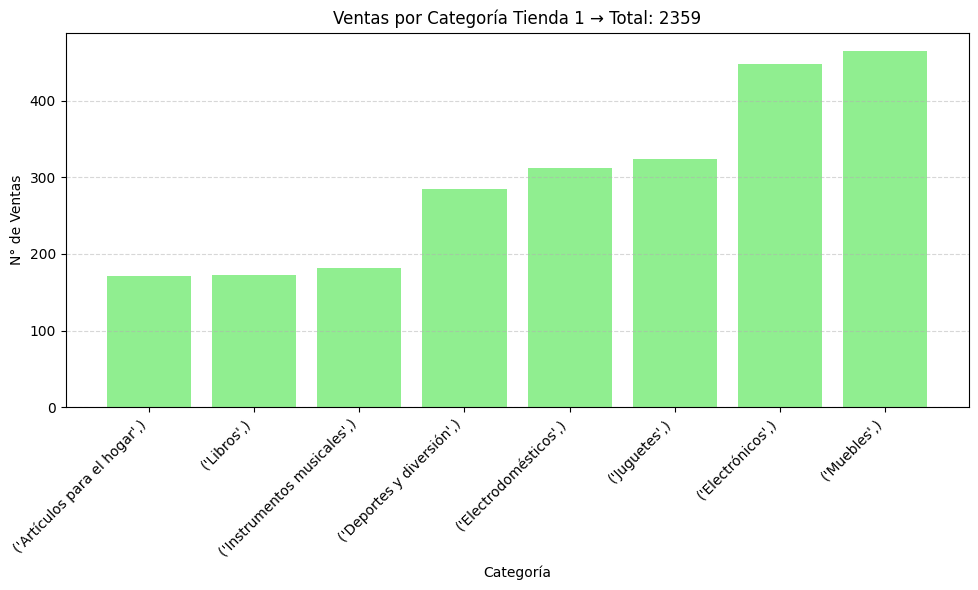

In [10]:
####################

# Agrupar y contar
total = 0
group_data = []
catTienda1=dataTiendaClear.groupby(['Categoría del Producto'])

for nombre, grupo_df in catTienda1:
    count = grupo_df.shape[0]
    total += count
    group_data.append({"Grupo": nombre, "Count": count})

# Convertir a DataFrame y ordenar de menor a mayor
df_categorias = pd.DataFrame(group_data)
df_categorias = df_categorias.sort_values(by='Count', ascending=True)

# Graficar
plt.figure(figsize=(10, 6))
plt.bar(df_categorias['Grupo'].astype(str), df_categorias['Count'], color='lightgreen')
plt.xlabel('Categoría')
plt.ylabel('N° de Ventas')
plt.title(f"Ventas por Categoría Tienda 1 → Total: {total}")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

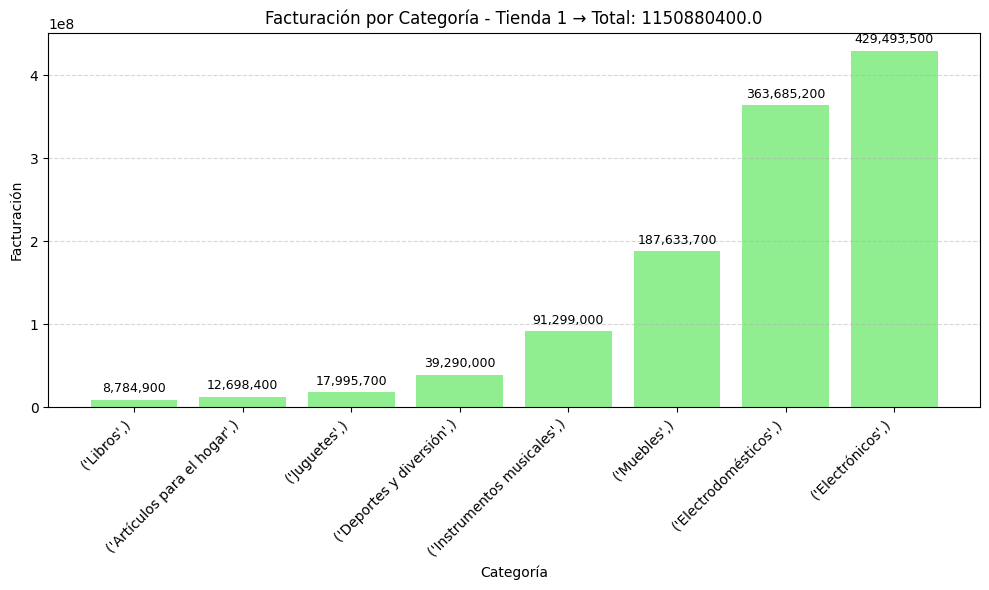

In [17]:
# Agrupar y sumar la facturación por categoría
total = 0
group_data = []
catTienda1 = dataTiendaClear.groupby(['Categoría del Producto'])

for nombre, grupo_df in catTienda1:
    suma_facturacion = grupo_df['Precio'].sum()
    total += suma_facturacion
    group_data.append({"Grupo": nombre, "Facturación": suma_facturacion})

# Convertir a DataFrame y ordenar de menor a mayor
df_categorias = pd.DataFrame(group_data)
df_categorias = df_categorias.sort_values(by='Facturación', ascending=True)

# Graficar
plt.figure(figsize=(10, 6))
bars = plt.bar(df_categorias['Grupo'].astype(str), df_categorias['Facturación'], color='lightgreen')
plt.xlabel('Categoría')
plt.ylabel('Facturación')
plt.title(f"Facturación por Categoría - Tienda 1 → Total: {round(total, 2)}")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Agregar valores encima de cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + (total * 0.005),  # posición y ajuste
             f'{yval:,.0f}', ha='center', va='bottom', fontsize=9)

plt.show()

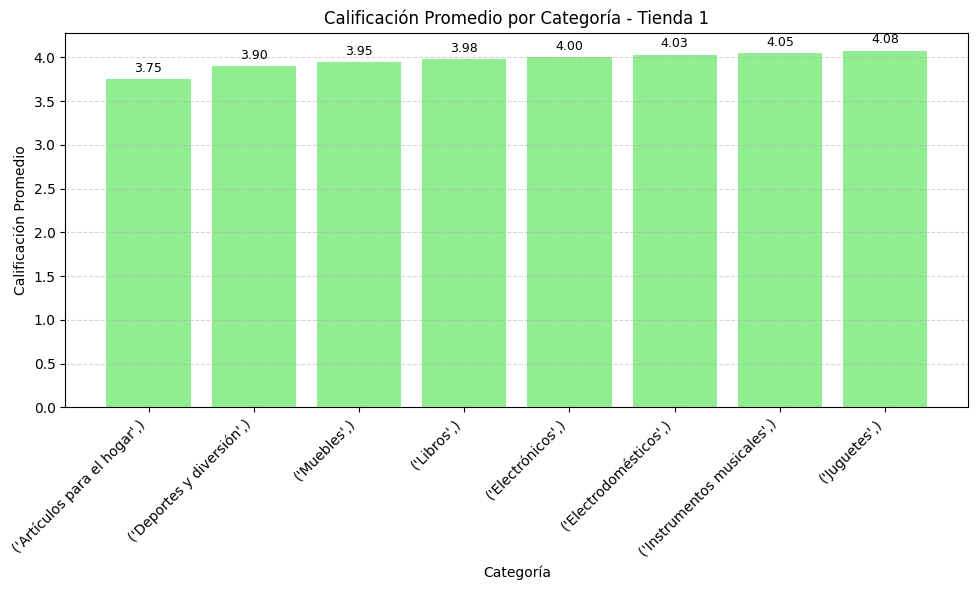

In [22]:
# Agrupar y calcular la calificación promedio por categoría
group_data = []
catTienda1 = dataTiendaClear.groupby(['Categoría del Producto'])

for nombre, grupo_df in catTienda1:
    promedio_calificacion = grupo_df['Calificación'].mean()
    group_data.append({"Grupo": nombre, "Calificación Promedio": promedio_calificacion})

# Convertir a DataFrame y ordenar de menor a mayor
df_categorias = pd.DataFrame(group_data)
df_categorias = df_categorias.sort_values(by='Calificación Promedio', ascending=True)

# Graficar
plt.figure(figsize=(10, 6))
bars = plt.bar(df_categorias['Grupo'].astype(str), df_categorias['Calificación Promedio'], color='lightgreen')
plt.xlabel('Categoría')
plt.ylabel('Calificación Promedio')
plt.title("Calificación Promedio por Categoría - Tienda 1")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Mostrar el valor sobre las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05,
             f'{yval:.2f}', ha='center', va='bottom', fontsize=9)

plt.show()

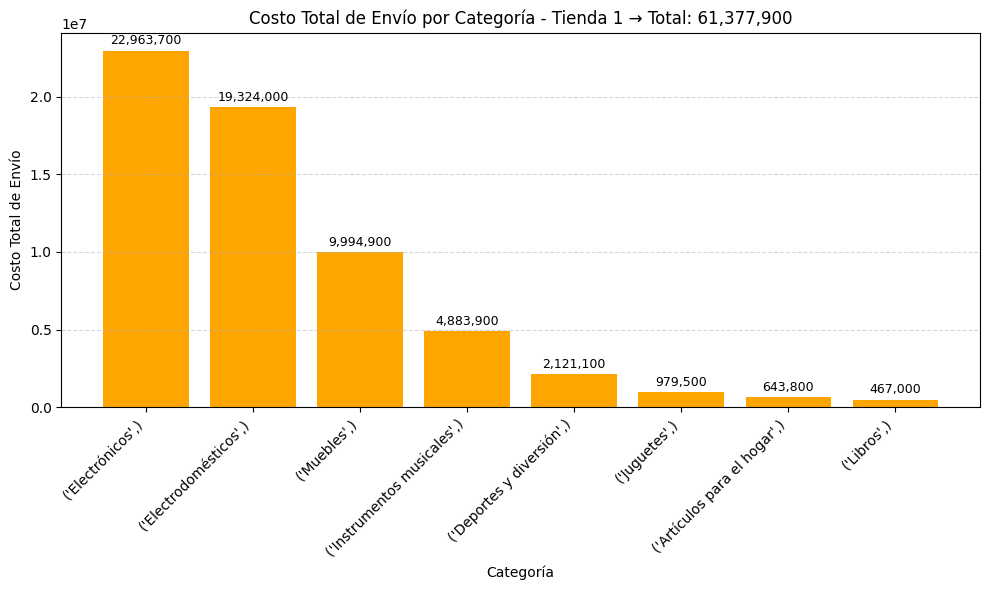

In [4]:
# Agrupar y sumar los costos de envío por categoría
total = 0
group_data = []
catTienda1 = dataTiendaClear.groupby(['Categoría del Producto'])

for nombre, grupo_df in catTienda1:
    costo_total = grupo_df['Costo de envío'].sum()
    total += costo_total
    group_data.append({"Grupo": nombre, "Costo Total": costo_total})

# Convertir a DataFrame y ordenar de menor a mayor
df_categorias = pd.DataFrame(group_data)
df_categorias = df_categorias.sort_values(by='Costo Total', ascending=False)

# Graficar
plt.figure(figsize=(10, 6))
bars = plt.bar(df_categorias['Grupo'].astype(str), df_categorias['Costo Total'], color='orange')
plt.xlabel('Categoría')
plt.ylabel('Costo Total de Envío')
plt.title(f"Costo Total de Envío por Categoría - Tienda 1 → Total: {total:,.0f}")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Agregar etiquetas con los valores sobre las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + max(df_categorias['Costo Total']) * 0.01,
             f'{yval:,.0f}', ha='center', va='bottom', fontsize=9)

plt.show()

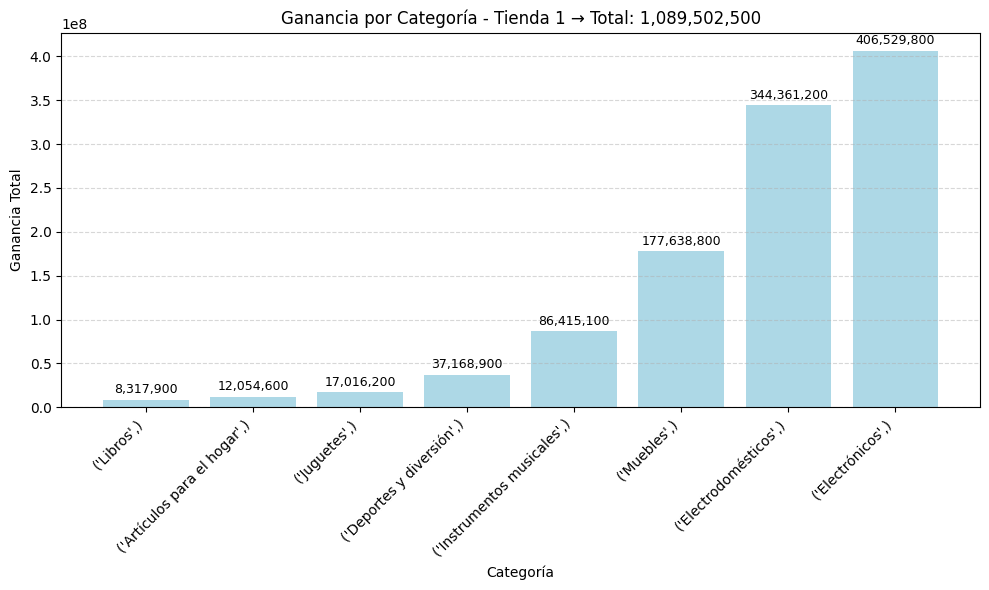

In [5]:
# Agrupar y calcular la ganancia total por categoría
total = 0
group_data = []
catTienda1 = dataTiendaClear.groupby(['Categoría del Producto'])

for nombre, grupo_df in catTienda1:
    ganancia_total = (grupo_df['Precio'] - grupo_df['Costo de envío']).sum()
    total += ganancia_total
    group_data.append({"Grupo": nombre, "Ganancia Total": ganancia_total})

# Convertir a DataFrame y ordenar de menor a mayor
df_categorias = pd.DataFrame(group_data)
df_categorias = df_categorias.sort_values(by='Ganancia Total', ascending=True)

# Graficar
plt.figure(figsize=(10, 6))
bars = plt.bar(df_categorias['Grupo'].astype(str), df_categorias['Ganancia Total'], color='lightblue')
plt.xlabel('Categoría')
plt.ylabel('Ganancia Total')
plt.title(f"Ganancia por Categoría - Tienda 1 → Total: {total:,.0f}")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Agregar etiquetas con los valores sobre las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + max(df_categorias['Ganancia Total']) * 0.01,
             f'{yval:,.0f}', ha='center', va='bottom', fontsize=9)

plt.show()

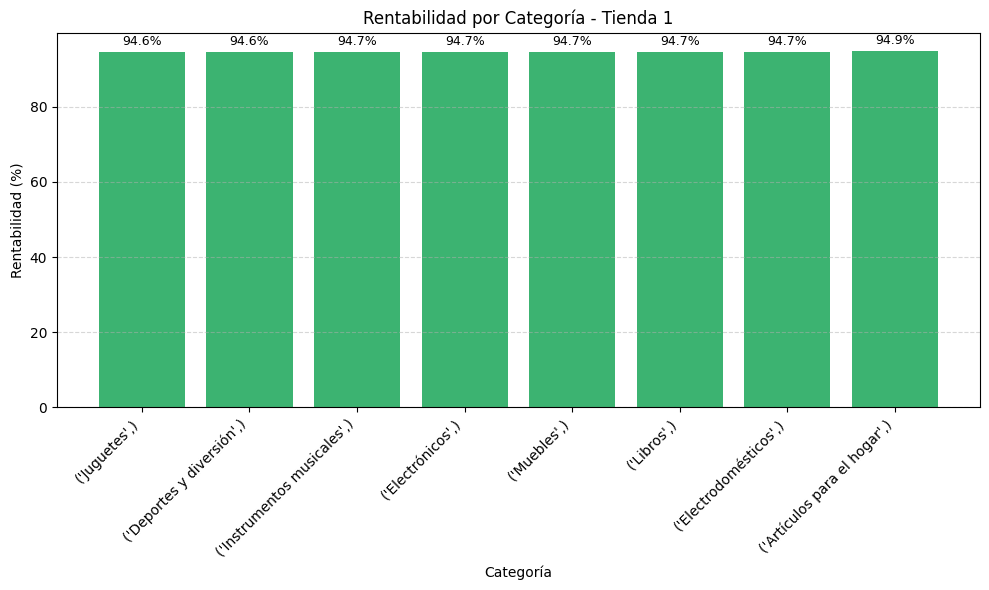

In [6]:
# Agrupar y calcular rentabilidad por categoría
group_data = []
catTienda1 = dataTiendaClear.groupby(['Categoría del Producto'])

for nombre, grupo_df in catTienda1:
    facturacion = grupo_df['Precio'].sum()
    costo_envio = grupo_df['Costo de envío'].sum()
    ganancia = facturacion - costo_envio
    rentabilidad_pct = (ganancia / facturacion) * 100 if facturacion > 0 else 0
    group_data.append({
        "Categoría": nombre,
        "Rentabilidad %": rentabilidad_pct
    })

# Convertir a DataFrame y ordenar
df_rentabilidad = pd.DataFrame(group_data)
df_rentabilidad = df_rentabilidad.sort_values(by='Rentabilidad %', ascending=True)

# Graficar
plt.figure(figsize=(10, 6))
bars = plt.bar(df_rentabilidad['Categoría'].astype(str), df_rentabilidad['Rentabilidad %'], color='mediumseagreen')
plt.xlabel('Categoría')
plt.ylabel('Rentabilidad (%)')
plt.title("Rentabilidad por Categoría - Tienda 1")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Agregar valores sobre las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1,
             f'{yval:.1f}%', ha='center', va='bottom', fontsize=9)

plt.show()

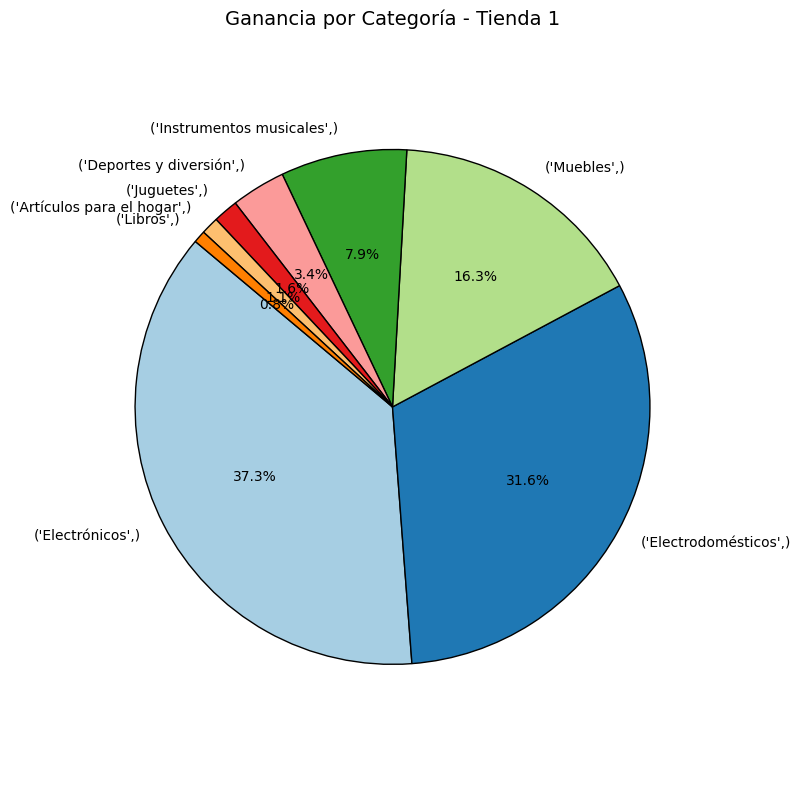

In [7]:
# Agrupar y calcular la ganancia total por categoría
group_data = []
catTienda1 = dataTiendaClear.groupby(['Categoría del Producto'])

for nombre, grupo_df in catTienda1:
    ganancia_total = (grupo_df['Precio'] - grupo_df['Costo de envío']).sum()
    group_data.append({"Grupo": nombre, "Ganancia Total": ganancia_total})

# Convertir a DataFrame y ordenar
df_categorias = pd.DataFrame(group_data)
df_categorias = df_categorias.sort_values(by='Ganancia Total', ascending=False)

# Graficar Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(df_categorias['Ganancia Total'],
        labels=df_categorias['Grupo'].astype(str),
        autopct='%1.1f%%',
        startangle=140,
        colors=plt.cm.Paired.colors,
        wedgeprops={'edgecolor': 'black'})

plt.title("Ganancia por Categoría - Tienda 1", fontsize=14)
plt.axis('equal')  # Para que sea un círculo perfecto
plt.tight_layout()
plt.show()

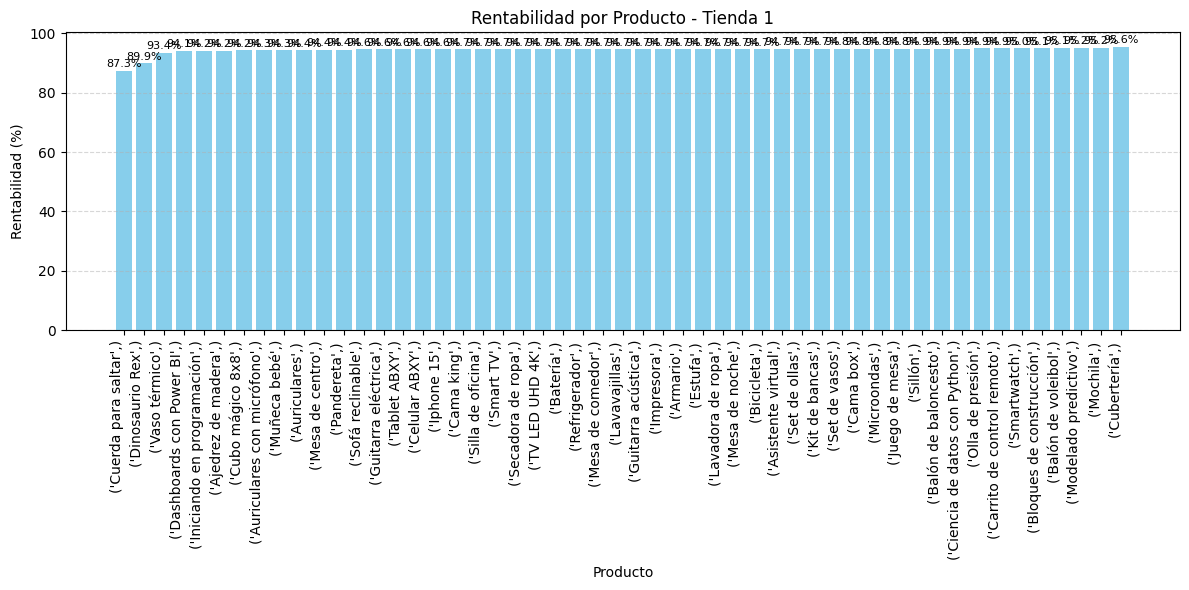

In [8]:
# Agrupar y calcular rentabilidad por producto
group_data = []
prodTienda1 = dataTiendaClear.groupby(['Producto'])  # Cambia 'Producto' por el nombre real de tu columna si es distinto

for nombre, grupo_df in prodTienda1:
    facturacion = grupo_df['Precio'].sum()
    costo_envio = grupo_df['Costo de envío'].sum()
    ganancia = facturacion - costo_envio
    rentabilidad_pct = (ganancia / facturacion) * 100 if facturacion > 0 else 0
    group_data.append({
        "Producto": nombre,
        "Rentabilidad %": rentabilidad_pct
    })

# Convertir a DataFrame y ordenar
df_rentabilidad = pd.DataFrame(group_data)
df_rentabilidad = df_rentabilidad.sort_values(by='Rentabilidad %', ascending=True)

# Graficar
plt.figure(figsize=(12, 6))
bars = plt.bar(df_rentabilidad['Producto'].astype(str), df_rentabilidad['Rentabilidad %'], color='skyblue')
plt.xlabel('Producto')
plt.ylabel('Rentabilidad (%)')
plt.title("Rentabilidad por Producto - Tienda 1")
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Agregar valores sobre las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5,
             f'{yval:.1f}%', ha='center', va='bottom', fontsize=8)

plt.show()

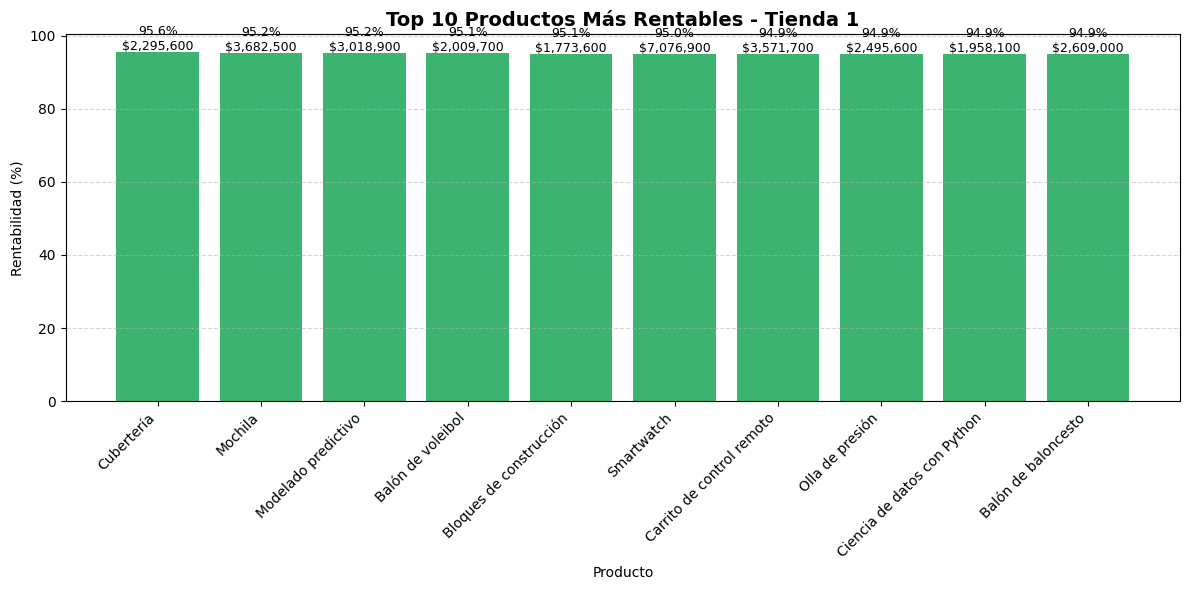

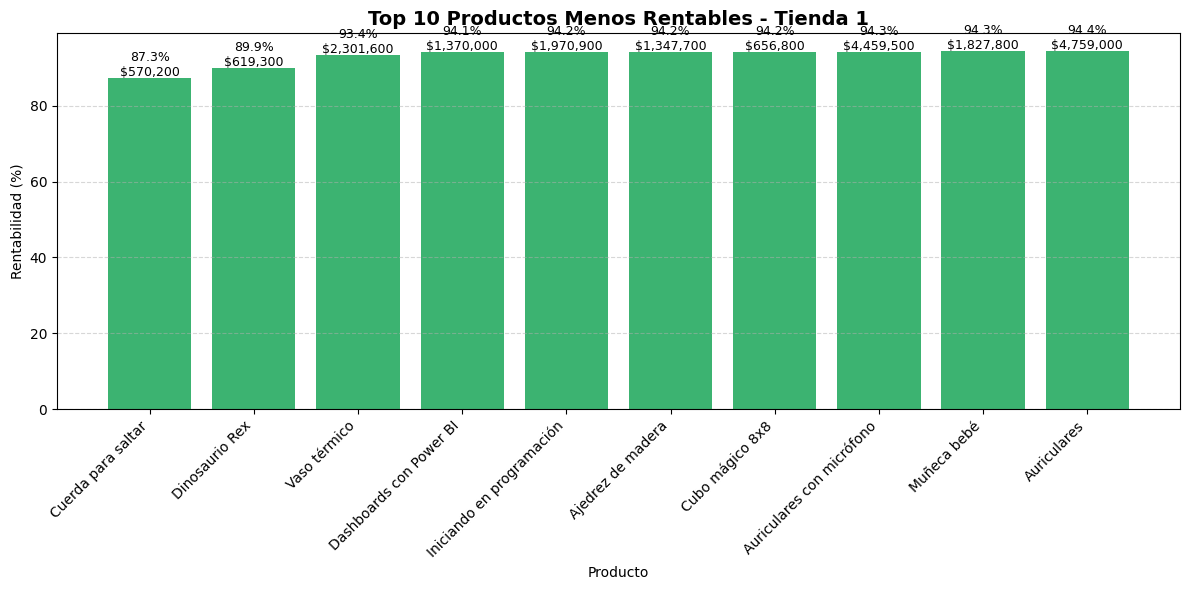

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Calcular rentabilidad por producto
product_data = []
productos = dataTiendaClear.groupby('Producto')

for nombre, grupo_df in productos:
    precio_total = grupo_df['Precio'].sum()
    costo_total = grupo_df['Costo de envío'].sum()
    ganancia = precio_total - costo_total
    rentabilidad_pct = (ganancia / precio_total) * 100 if precio_total > 0 else 0
    product_data.append({
        'Producto': nombre,
        'Rentabilidad %': rentabilidad_pct,
        'Ganancia': ganancia,
        'Precio Total': precio_total,
        'Unidades': len(grupo_df),
        'Precio Promedio': grupo_df['Precio'].mean(),
        'Costo Promedio': grupo_df['Costo de envío'].mean()
    })

# Crear DataFrame
df_productos = pd.DataFrame(product_data)
df_ordenado = df_productos.sort_values(by='Rentabilidad %', ascending=True)

# Separar en dos grupos
top_10 = df_ordenado.tail(10).sort_values(by='Rentabilidad %', ascending=False)
bottom_10 = df_ordenado.head(10)

# Función para graficar
def graficar_rentabilidad(df, titulo):
    fig, ax = plt.subplots(figsize=(12, 6))
    bars = ax.bar(df['Producto'], df['Rentabilidad %'], color='mediumseagreen')
    ax.set_title(titulo, fontsize=14, fontweight='bold')
    ax.set_ylabel('Rentabilidad (%)')
    ax.set_xlabel('Producto')
    ax.grid(axis='y', linestyle='--', alpha=0.5)
    plt.xticks(rotation=45, ha='right')

    # Agregar anotaciones
    for bar, (_, row) in zip(bars, df.iterrows()):
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 0.5,
                f"{yval:.1f}%\n${row['Ganancia']:,.0f}", ha='center', fontsize=9)

    plt.tight_layout()
    plt.show()

# Mostrar los dos gráficos
graficar_rentabilidad(top_10, 'Top 10 Productos Más Rentables - Tienda 1')
graficar_rentabilidad(bottom_10, 'Top 10 Productos Menos Rentables - Tienda 1')

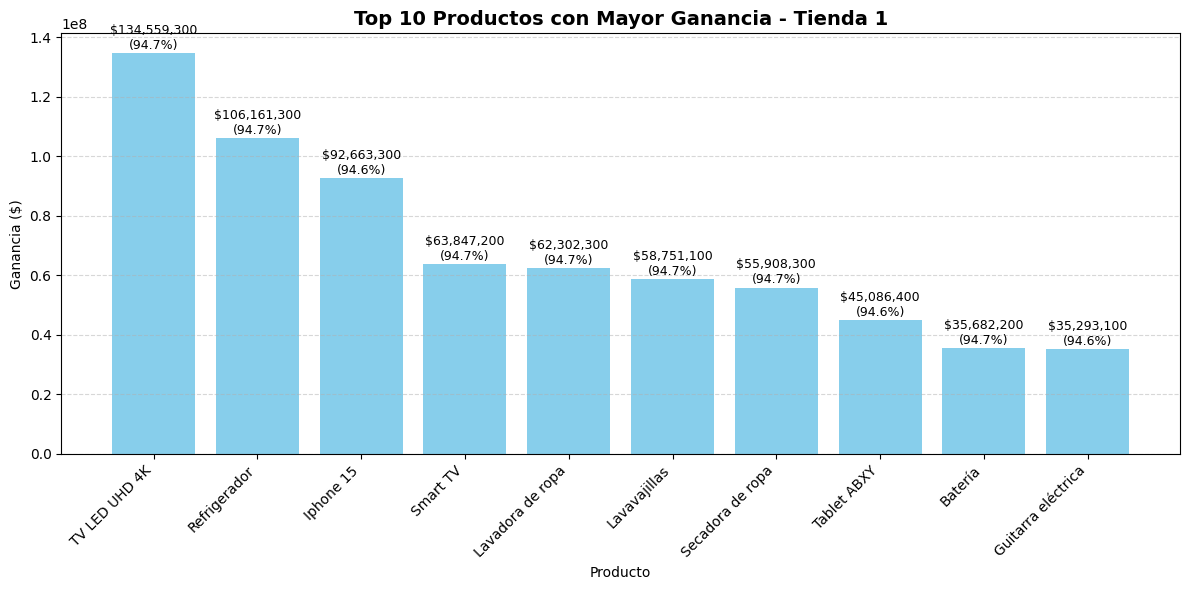

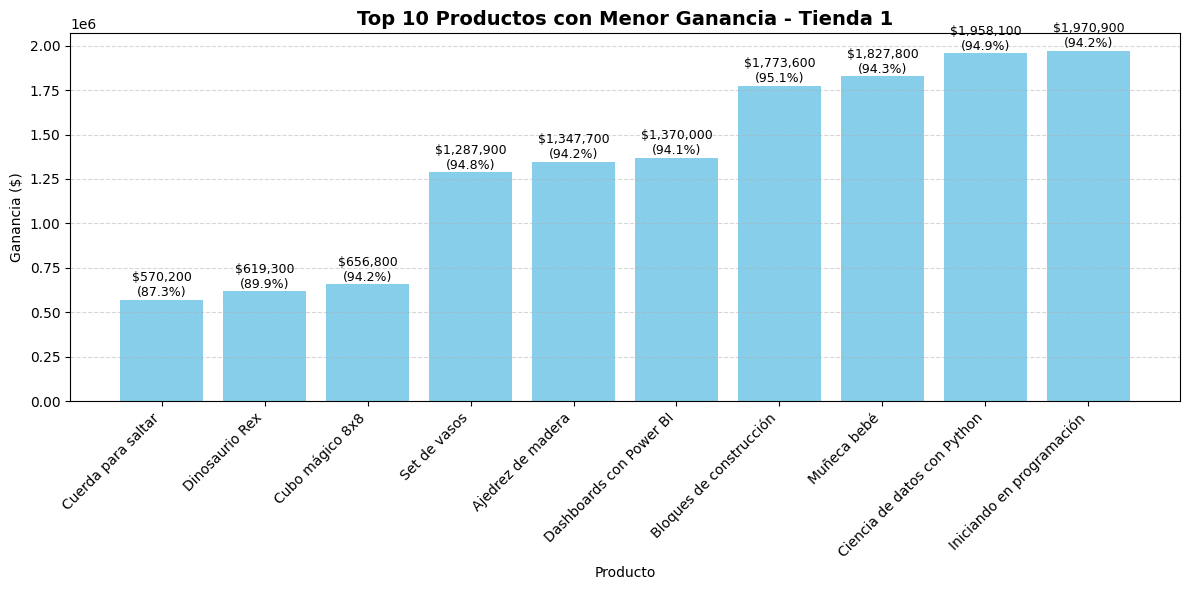

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Calcular rentabilidad por producto
product_data = []
productos = dataTiendaClear.groupby('Producto')

for nombre, grupo_df in productos:
    precio_total = grupo_df['Precio'].sum()
    costo_total = grupo_df['Costo de envío'].sum()
    ganancia = precio_total - costo_total
    rentabilidad_pct = (ganancia / precio_total) * 100 if precio_total > 0 else 0
    product_data.append({
        'Producto': nombre,
        'Rentabilidad %': rentabilidad_pct,
        'Ganancia': ganancia,
        'Precio Total': precio_total,
        'Unidades': len(grupo_df),
        'Precio Promedio': grupo_df['Precio'].mean(),
        'Costo Promedio': grupo_df['Costo de envío'].mean()
    })

# Crear DataFrame
df_productos = pd.DataFrame(product_data)
df_ordenado = df_productos.sort_values(by='Ganancia', ascending=True)

# Separar en dos grupos (por ganancia)
top_10 = df_ordenado.tail(10).sort_values(by='Ganancia', ascending=False)
bottom_10 = df_ordenado.head(10)

# Función para graficar
def graficar_rentabilidad(df, titulo):
    fig, ax = plt.subplots(figsize=(12, 6))
    bars = ax.bar(df['Producto'], df['Ganancia'], color='skyblue')
    ax.set_title(titulo, fontsize=14, fontweight='bold')
    ax.set_ylabel('Ganancia ($)')
    ax.set_xlabel('Producto')
    ax.grid(axis='y', linestyle='--', alpha=0.5)
    plt.xticks(rotation=45, ha='right')

    # Agregar anotaciones
    for bar, (_, row) in zip(bars, df.iterrows()):
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 0.01 * df['Ganancia'].max(),
                f"${yval:,.0f}\n({row['Rentabilidad %']:.1f}%)",
                ha='center', fontsize=9)

    plt.tight_layout()
    plt.show()

# Mostrar los dos gráficos
graficar_rentabilidad(top_10, 'Top 10 Productos con Mayor Ganancia - Tienda 1')
graficar_rentabilidad(bottom_10, 'Top 10 Productos con Menor Ganancia - Tienda 1')

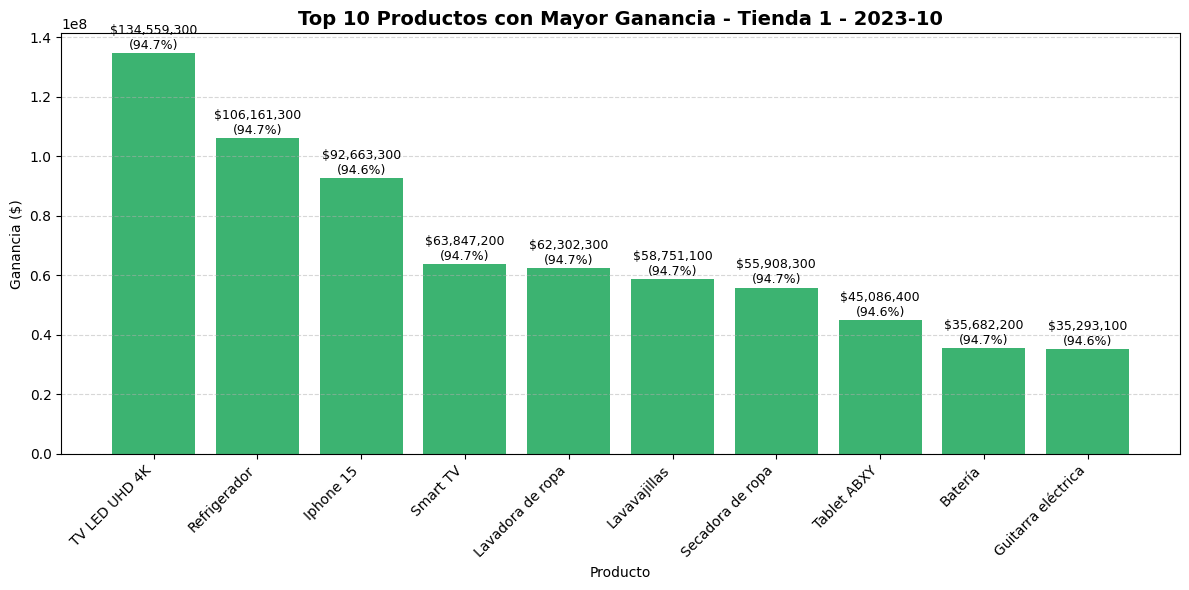

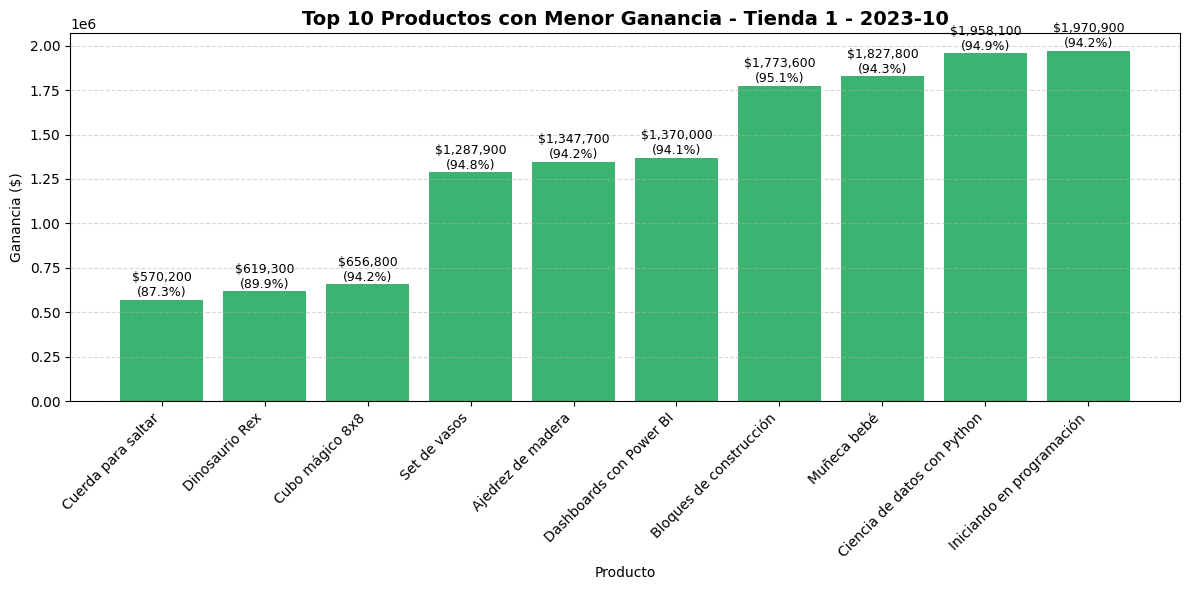

In [17]:

## NO EJECUTAR HASTA CORREGIR CON AYUDA DE CHAT GPT

import pandas as pd
import matplotlib.pyplot as plt

# 🗓️ FILTRO POR AÑO Y MES
anio_seleccionado = 2024
mes_seleccionado = 1  # Enero

# Convertir a fecha si no está
#TODO

# Si la columna 'anho-mes' no es datetime, convertirla
if not pd.api.types.is_datetime64_any_dtype(dataTiendaClear['anho-mes']):
    dataTiendaClear['anho-mes'] = pd.to_datetime(dataTiendaClear['anho-mes'], format='%Y-%m')

# Definir año y mes seleccionados
anio_seleccionado = 2023
mes_seleccionado = 10

# Filtrar por año y mes
filtro = (dataTiendaClear['anho-mes'].dt.year == anio_seleccionado) & \
         (dataTiendaClear['anho-mes'].dt.month == mes_seleccionado)

# Aplicar el filtro
datos_filtrados = dataTiendaClear[filtro]


# Agrupación y cálculo de rentabilidad por producto
product_data = []
productos = datos_filtrados.groupby('Producto')

for nombre, grupo_df in productos:
    precio_total = grupo_df['Precio'].sum()
    costo_total = grupo_df['Costo de envío'].sum()
    ganancia = precio_total - costo_total
    rentabilidad_pct = (ganancia / precio_total) * 100 if precio_total > 0 else 0
    product_data.append({
        'Producto': nombre,
        'Rentabilidad %': rentabilidad_pct,
        'Ganancia': ganancia,
        'Precio Total': precio_total,
        'Unidades': len(grupo_df),
        'Precio Promedio': grupo_df['Precio'].mean(),
        'Costo Promedio': grupo_df['Costo de envío'].mean()
    })

# Crear DataFrame
df_productos = pd.DataFrame(product_data)

# Ordenar por ganancia
df_ordenado = df_productos.sort_values(by='Ganancia', ascending=True)

# Separar top y bottom 10
top_10 = df_ordenado.tail(10).sort_values(by='Ganancia', ascending=False)
bottom_10 = df_ordenado.head(10)

# 📊 Función para graficar
def graficar_rentabilidad(df, titulo):
    fig, ax = plt.subplots(figsize=(12, 6))
    bars = ax.bar(df['Producto'], df['Ganancia'], color='mediumseagreen')
    ax.set_title(titulo, fontsize=14, fontweight='bold')
    ax.set_ylabel('Ganancia ($)')
    ax.set_xlabel('Producto')
    ax.grid(axis='y', linestyle='--', alpha=0.5)
    plt.xticks(rotation=45, ha='right')

    for bar, (_, row) in zip(bars, df.iterrows()):
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 0.01 * df['Ganancia'].max(),
                f"${yval:,.0f}\n({row['Rentabilidad %']:.1f}%)",
                ha='center', fontsize=9)

    plt.tight_layout()
    plt.show()

# 🔽 Mostrar gráficos
titulo_base = f"Tienda 1 - {anio_seleccionado}-{mes_seleccionado:02d}"
graficar_rentabilidad(top_10, f"Top 10 Productos con Mayor Ganancia - {titulo_base}")
graficar_rentabilidad(bottom_10, f"Top 10 Productos con Menor Ganancia - {titulo_base}")


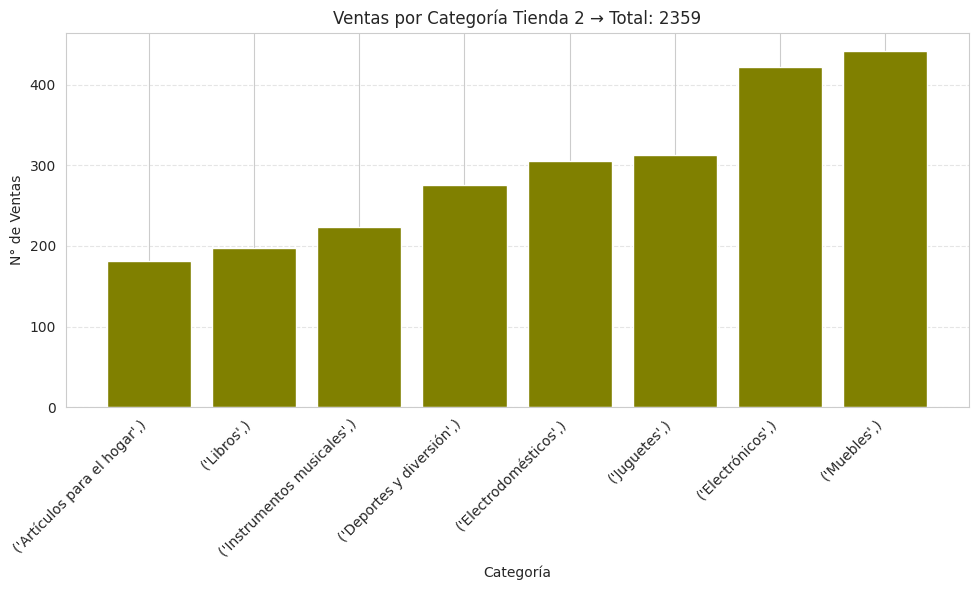

In [ ]:
#TIENDA 2 por CATEGORIAS

# Agrupar y contar
total = 0
group_data2 = []
catTienda2 = dataTienda2Clear.groupby(['Categoría del Producto'])

for nombre, grupo_df in catTienda2:
    count = grupo_df.shape[0]
    total += count
    group_data2.append({"Grupo": nombre, "Count": count})

# Convertir a DataFrame y ordenar de menor a mayor
df_categorias = pd.DataFrame(group_data2)
df_categorias = df_categorias.sort_values(by='Count', ascending=True)

# Graficar
plt.figure(figsize=(10, 6))
plt.bar(df_categorias['Grupo'].astype(str), df_categorias['Count'], color='olive')
plt.xlabel('Categoría')
plt.ylabel('N° de Ventas')
plt.title(f"Ventas por Categoría Tienda 2 → Total: {total}")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


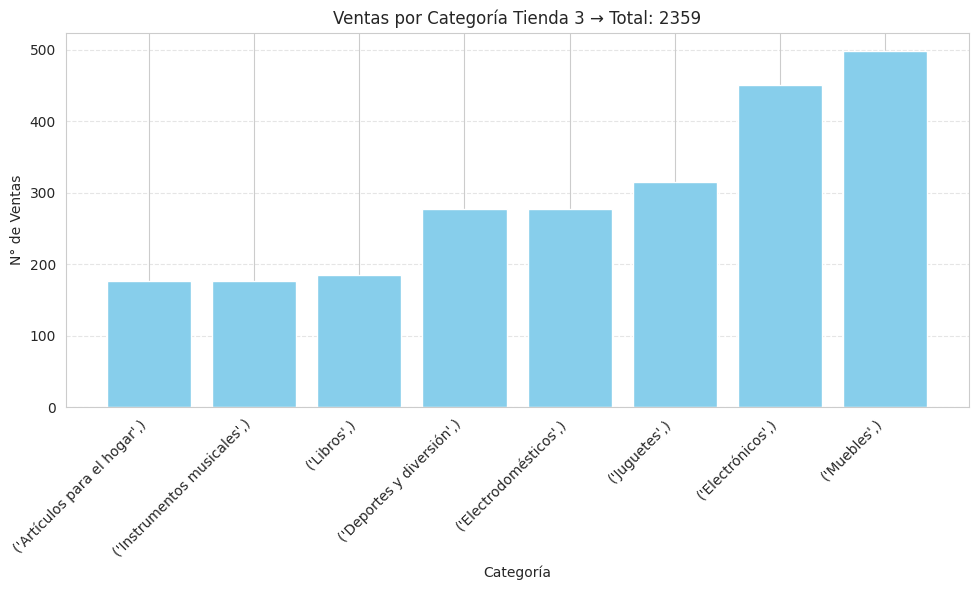

In [ ]:


# Agrupar y contar
total = 0
group_data3 = []
catTienda3 = dataTienda3Clear.groupby(['Categoría del Producto'])

for nombre, grupo_df in catTienda3:
    count = grupo_df.shape[0]
    total += count
    group_data3.append({"Grupo": nombre, "Count": count})

# Convertir a DataFrame y ordenar de menor a mayor
df_categorias = pd.DataFrame(group_data3)
df_categorias = df_categorias.sort_values(by='Count', ascending=True)

# Graficar
plt.figure(figsize=(10, 6))
plt.bar(df_categorias['Grupo'].astype(str), df_categorias['Count'], color='skyblue')
plt.xlabel('Categoría')
plt.ylabel('N° de Ventas')
plt.title(f"Ventas por Categoría Tienda 3 → Total: {total}")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

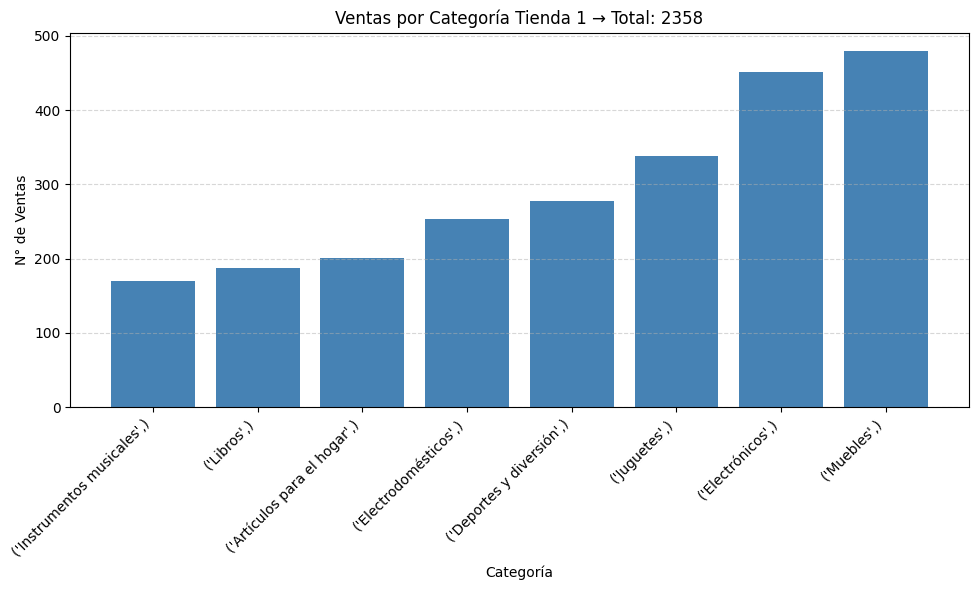

In [13]:
# Agrupar y contar
total = 0
group_data4 = []
catTienda4=dataTienda4Clear.groupby(['Categoría del Producto'])

for nombre, grupo_df in catTienda4:
    count = grupo_df.shape[0]
    total += count
    group_data4.append({"Grupo": nombre, "Count": count})

# Convertir a DataFrame y ordenar de menor a mayor
df_categorias = pd.DataFrame(group_data4)
df_categorias = df_categorias.sort_values(by='Count', ascending=True)

# Graficar
plt.figure(figsize=(10, 6))
plt.bar(df_categorias['Grupo'].astype(str), df_categorias['Count'], color='steelblue')
plt.xlabel('Categoría')
plt.ylabel('N° de Ventas')
plt.title(f"Ventas por Categoría Tienda 1 → Total: {total}")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

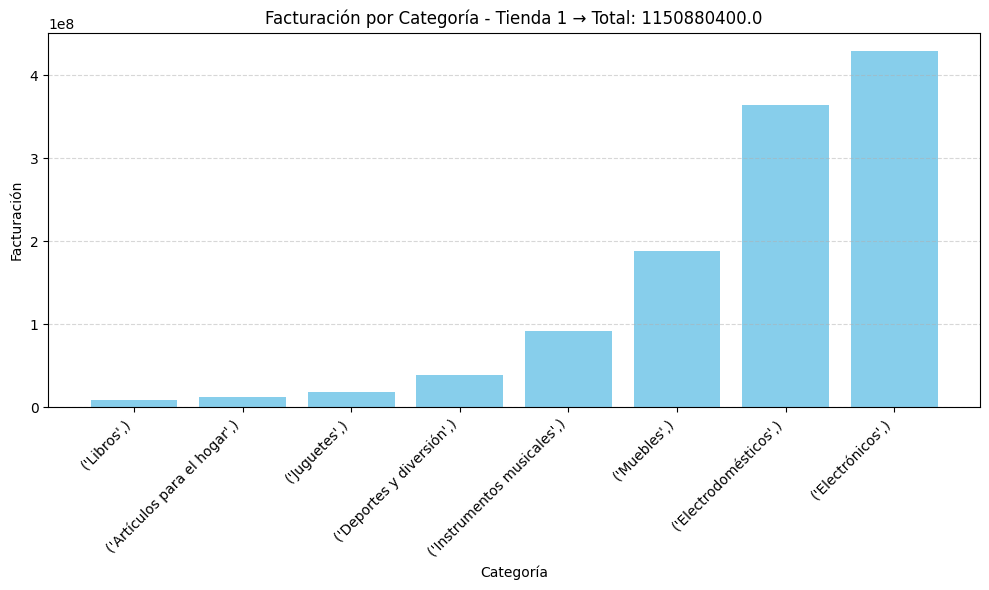

# 3. Calificación promedio de la tienda


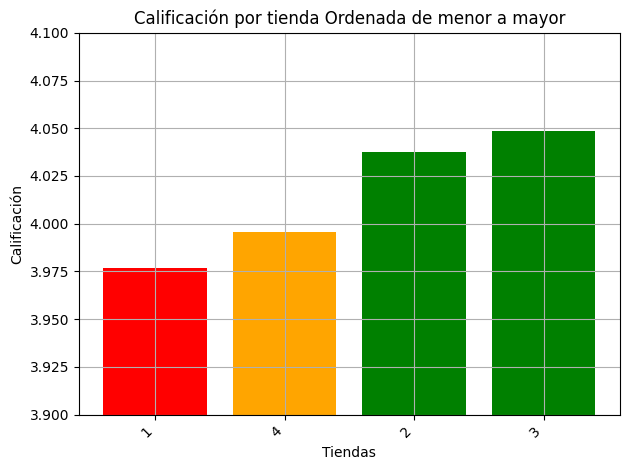

Tienda,Calificación
1,3.976685
4,3.995759
2,4.037304
3,4.048326


In [ ]:
dataCalifTienda=[]

calPromTienda1=  dataTienda1['Calificación'].mean()
calPromTienda2=  dataTienda2['Calificación'].mean()
calPromTienda3=  dataTienda3['Calificación'].mean()
calPromTienda4=  dataTienda4['Calificación'].mean()

dataCalifTienda.extend([
    {"Tienda": str(1), "Calificación": calPromTienda1},
    {"Tienda": str(2), "Calificación": calPromTienda2},
    {"Tienda": str(3), "Calificación": calPromTienda3},
    {"Tienda": str(4), "Calificación": calPromTienda4}
])



# Primero, crea y ordena el DataFrame
dfCalifTienda = pd.DataFrame(dataCalifTienda).sort_values(by='Calificación', ascending=True)

# Luego, aplica el estilo
styled_df =dfCalifTienda.style.apply(color_minimo_otros_verde, subset=['Calificación'])






dataCalifTienda = pd.DataFrame(dataCalifTienda).sort_values(by='Calificación', ascending=True).to_dict('records')



calificaciones = [group['Calificación'] for group in dataCalifTienda]
tiendas = [group['Tienda'][0] for group in dataCalifTienda]

plt.bar(tiendas, calificaciones, color=['red','orange','green','green'] )
plt.ylim(3.9, 4.1)

plt.xlabel('Tiendas')
plt.ylabel('Calificación')
plt.title("Calificación por tienda Ordenada de menor a mayor")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid()
plt.show()
print('\n')

styled_df.hide(axis="index")




# 4. Productos más y menos vendidos

In [ ]:
#Tienda1

prouTienda = dataTiendaClear.groupby('Producto')
group_prod = []

for nombre, grupo_df in prouTienda:
    count = grupo_df['Producto'].count()
    group_prod.append({
        "Producto": nombre,
        "Count": count
    })

# Ordenar de mayor a menor por 'Count'
group_prod = sorted(group_prod, key=lambda x: x['Count'], reverse=True)

df_group_prod = pd.DataFrame(group_prod)
#df_group_prod
display(df_group_prod.head(10).style.set_caption('Tienda 1 >>articulos más vendidos<<') )



#df_group_prod
display(df_group_prod.tail(10).style.set_caption('Tienda 1 >>productos menos vendidos<<') )
#print(group_prod)

# Extract the 'Count' and 'Producto' values into separate lists
#conteo = [group['Count'] for group in group_prod]
#productos = [group['Producto'] for group in group_prod]

#plt.pie(conteo, labels=productos) # Pass the lists to plt.pie
#plt.show()

#print(group_prod)


#plt.pie(conteo, productos)
#plt.xlabel('Productos')
#plt.ylabel('Vendidos')
#plt.title(f"Ventas por Producto  --> total:"+str(total))
#plt.xticks(rotation=45, ha='right')
#plt.tight_layout()
#plt.grid()
#plt.show()

,Producto,Count
0,Armario,60
1,Microondas,60
2,TV LED UHD 4K,60
3,Secadora de ropa,58
4,Bloques de construcción,56
5,Mesa de noche,56
6,Balón de baloncesto,55
7,Bicicleta,54
8,Impresora,54
9,Refrigerador,54


,Producto,Count
41,Cuerda para saltar,40
42,Dinosaurio Rex,40
43,Mesa de comedor,40
44,Muñeca bebé,40
45,Ciencia de datos con Python,39
46,Mochila,39
47,Pandereta,36
48,Olla de presión,35
49,Auriculares con micrófono,33
50,Celular ABXY,33


In [ ]:
#Tienda2

prouTienda2 = dataTienda2Clear.groupby('Producto')
group_prod2 = []

for nombre, grupo_df in prouTienda2:
    count = grupo_df['Producto'].count()
    group_prod2.append({
        "Producto": nombre,
        "Count": count
    })

# Ordenar de mayor a menor por 'Count'
group_prod2 = sorted(group_prod2, key=lambda x: x['Count'], reverse=True)

df_group_prod2 = pd.DataFrame(group_prod2)
#df_group_prod
display(df_group_prod2.head(10).style.set_caption('Tienda 2 >>productos más vendidos]<<') )


#df_group_prod
display(df_group_prod2.tail(10).style.set_caption('Tienda 2 >>productos menos vendidos<<') )






,Producto,Count
0,Iniciando en programación,65
1,Microondas,62
2,Batería,61
3,Guitarra acústica,58
4,Pandereta,58
5,Secadora de ropa,57
6,Iphone 15,55
7,Armario,54
8,Bloques de construcción,54
9,Set de ollas,52


,Producto,Count
41,Estufa,42
42,Celular ABXY,41
43,Smart TV,40
44,Cubertería,39
45,Asistente virtual,38
46,Auriculares,37
47,Sillón,35
48,Impresora,34
49,Mesa de comedor,34
50,Juego de mesa,32


In [ ]:
#Tienda3

prouTienda3 = dataTienda3Clear.groupby('Producto')
group_prod3 = []

for nombre, grupo_df in prouTienda3:
    count = grupo_df['Producto'].count()
    group_prod3.append({
        "Producto": nombre,
        "Count": count
    })

# Ordenar de mayor a menor por 'Count'
group_prod3 = sorted(group_prod3, key=lambda x: x['Count'], reverse=True)

df_group_prod3 = pd.DataFrame(group_prod3)
#df_group_prod
display(df_group_prod3.head(10).style.set_caption('Tienda 3  >>articulos más vendidos<<') )

display(df_group_prod3.tail(10).style.set_caption('Tienda 3 >>articulos menos vendidos<<') )

,Producto,Count
0,Kit de bancas,57
1,Cama king,56
2,Mesa de comedor,56
3,Mesa de noche,55
4,Set de ollas,55
5,Smart TV,54
6,Cuerda para saltar,53
7,Estufa,53
8,Modelado predictivo,53
9,Bicicleta,52


,Producto,Count
41,Asistente virtual,39
42,Auriculares con micrófono,39
43,Cubertería,39
44,Muñeca bebé,39
45,Guitarra eléctrica,38
46,Vaso térmico,38
47,Microondas,36
48,Mochila,36
49,Set de vasos,36
50,Bloques de construcción,35


In [ ]:
#Tienda4

prouTienda4 = dataTienda4Clear.groupby('Producto')
group_prod4 = []

for nombre, grupo_df in prouTienda4:
    count = grupo_df['Producto'].count()
    group_prod4.append({
        "Producto": nombre,
        "Count": count
    })

# Ordenar de mayor a menor por 'Count'
group_prod4 = sorted(group_prod4, key=lambda x: x['Count'], reverse=True)

df_group_prod4 = pd.DataFrame(group_prod4)
#df_group_prod
display(df_group_prod4.head(10).style.set_caption('Tienda 4 articulos más vendidos') )

display(df_group_prod4.tail(10).style.set_caption('Tienda 4 >>articulos menos vendidos<<') )

,Producto,Count
0,Cama box,62
1,Cubertería,59
2,Cama king,56
3,Dashboards con Power BI,56
4,Carrito de control remoto,55
5,Mesa de comedor,55
6,Mesa de noche,55
7,Bloques de construcción,54
8,Smart TV,54
9,Pandereta,52


,Producto,Count
41,TV LED UHD 4K,40
42,Ajedrez de madera,39
43,Celular ABXY,39
44,Smartwatch,39
45,Ciencia de datos con Python,38
46,Lavadora de ropa,38
47,Refrigerador,38
48,Guitarra acústica,37
49,Armario,34
50,Guitarra eléctrica,33


# 5. Envío promedio por tienda

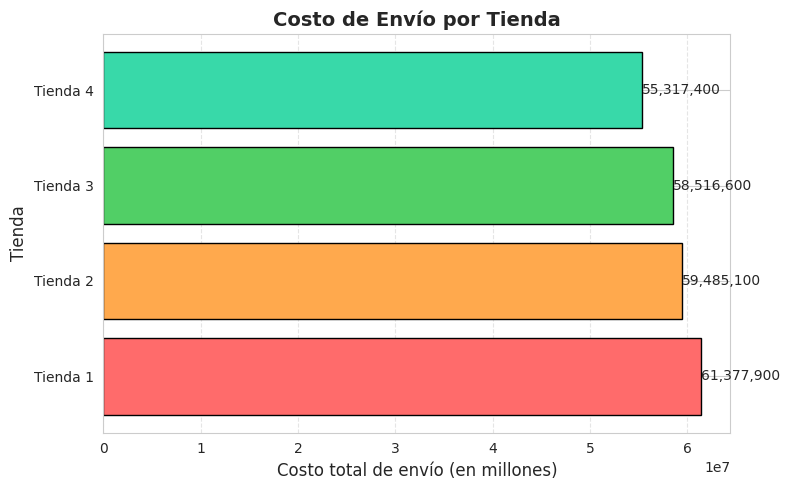

In [ ]:
#Costos por tienda de productos
costoEnvTienda1= int(dataTienda1['Costo de envío'].sum())
costoEnvTienda2= int(dataTienda2['Costo de envío'].sum())
costoEnvTienda3= int(dataTienda3['Costo de envío'].sum())
costoEnvTienda4= int(dataTienda4['Costo de envío'].sum())


tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
costosTiendas = [costoEnvTienda1, costoEnvTienda2, costoEnvTienda3, costoEnvTienda4]
colores=['red', 'orange', 'green', 'green']

# Colores más suaves
colores = ['#FF6B6B', '#FFA94D', '#51CF66', '#38D9A9']

# Estilo general
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(8, 5))

# Gráfico
barras = ax.barh(tiendas, costosTiendas, color=colores, edgecolor='black')

# Etiquetas en las barras
for barra in barras:
    ancho = barra.get_width()
    ax.text(ancho + 50,                      # Posición x
            barra.get_y() + barra.get_height() / 2,  # Posición y
            f'{ancho:,}',                    # Texto con separador de miles
            va='center', ha='left', fontsize=10)

# Títulos y etiquetas
ax.set_xlabel('Costo total de envío (en millones)', fontsize=12)
ax.set_ylabel('Tienda', fontsize=12)
ax.set_title('Costo de Envío por Tienda', fontsize=14, fontweight='bold')

# Mejoras visuales
ax.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

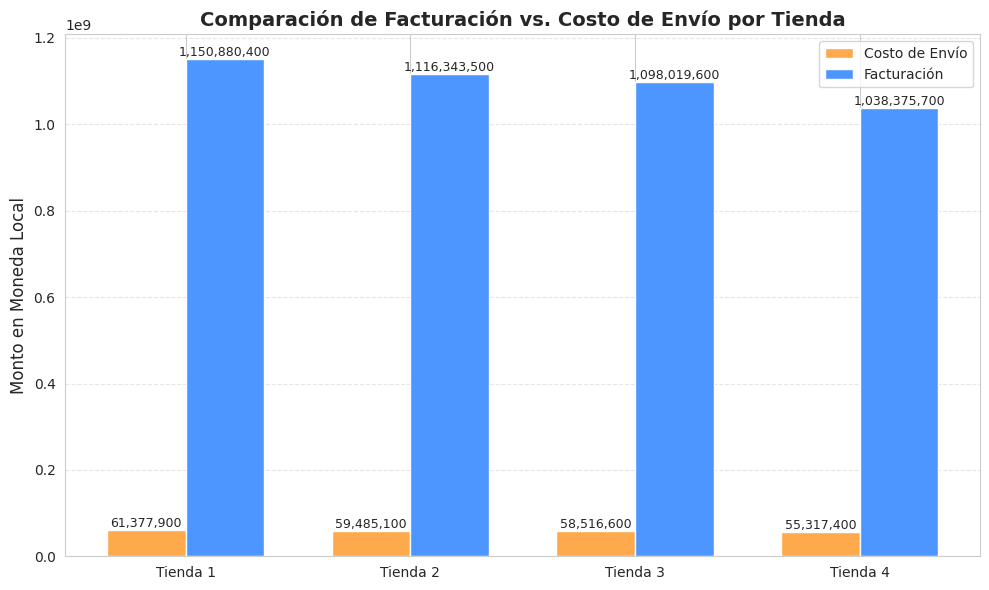

[np.float64(18.75072949709912),
 np.float64(18.76677520925408),
 np.float64(18.764241258036183),
 np.float64(18.771231113537514)]

In [ ]:
#Ratio Facturación VS Costos.
#Facturación-costo
facturaciones=[factTienda1, factTienda2, factTienda3, factTienda4]
ratioFactuCosto=[factTienda1/costoEnvTienda1, factTienda2/costoEnvTienda2, factTienda3/costoEnvTienda3, factTienda4/costoEnvTienda4]
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
# Posiciones para las barras
x = np.arange(len(tiendas))  # posiciones base
ancho = 0.35  # ancho de cada barra

# Crear gráfico
fig, ax = plt.subplots(figsize=(10, 6))

# Barras para cada métrica
barras1 = ax.bar(x - ancho/2, costosTiendas, width=ancho, label='Costo de Envío', color='#FFA94D')
barras2 = ax.bar(x + ancho/2, facturaciones, width=ancho, label='Facturación', color='#4D96FF')

# Etiquetas de valor sobre las barras
for barra in barras1:
    altura = barra.get_height()
    ax.text(barra.get_x() + barra.get_width() / 2, altura + 50000, f'{int(altura):,}',
            ha='center', va='bottom', fontsize=9)

for barra in barras2:
    altura = barra.get_height()
    ax.text(barra.get_x() + barra.get_width() / 2, altura + 50000, f'{int(altura):,}',
            ha='center', va='bottom', fontsize=9)

# Títulos y configuración
ax.set_ylabel('Monto en Moneda Local', fontsize=12)
ax.set_title('Comparación de Facturación vs. Costo de Envío por Tienda', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(tiendas)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()
display(ratioFactuCosto)



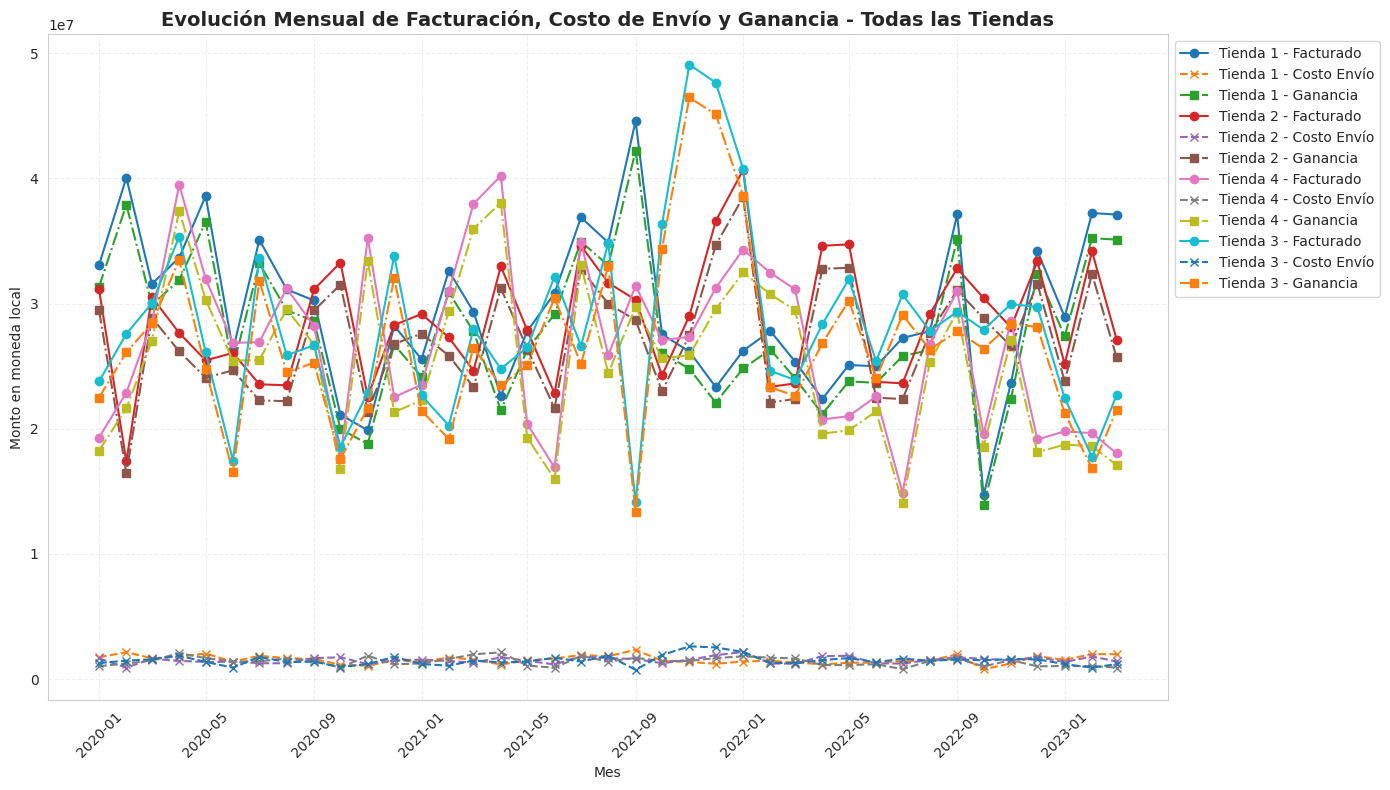

In [ ]:

df1 = resumen_por_mes(tienda, 'Tienda 1')
df2 = resumen_por_mes(tienda2, 'Tienda 2')
df3 = resumen_por_mes(tienda3, 'Tienda 3')
df4 = resumen_por_mes(tienda4, 'Tienda 4')

df_total = pd.concat([df1, df2, df3, df4])

# Convertir tuplas a fecha (si son tipo (año, mes))
df_total['Grupo'] = df_total['Grupo'].astype(str).str.strip("(',')")
df_total['Grupo'] = pd.to_datetime(df_total['Grupo'], format='%Y-%m')
df_total = df_total.sort_values(by='Grupo')

plt.figure(figsize=(14, 8))

for tienda in df_total['Tienda'].unique():
    df_plot = df_total[df_total['Tienda'] == tienda]
    plt.plot(df_plot['Grupo'], df_plot['Facturado'], marker='o', label=f'{tienda} - Facturado')
    plt.plot(df_plot['Grupo'], df_plot['CostoEnvio'], marker='x', linestyle='--', label=f'{tienda} - Costo Envío')
    plt.plot(df_plot['Grupo'], df_plot['Ganancia'], marker='s', linestyle='-.', label=f'{tienda} - Ganancia')

plt.title('Evolución Mensual de Facturación, Costo de Envío y Ganancia - Todas las Tiendas', fontsize=14, fontweight='bold')
plt.xlabel('Mes')
plt.ylabel('Monto en moneda local')
plt.grid(linestyle='--', alpha=0.3)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

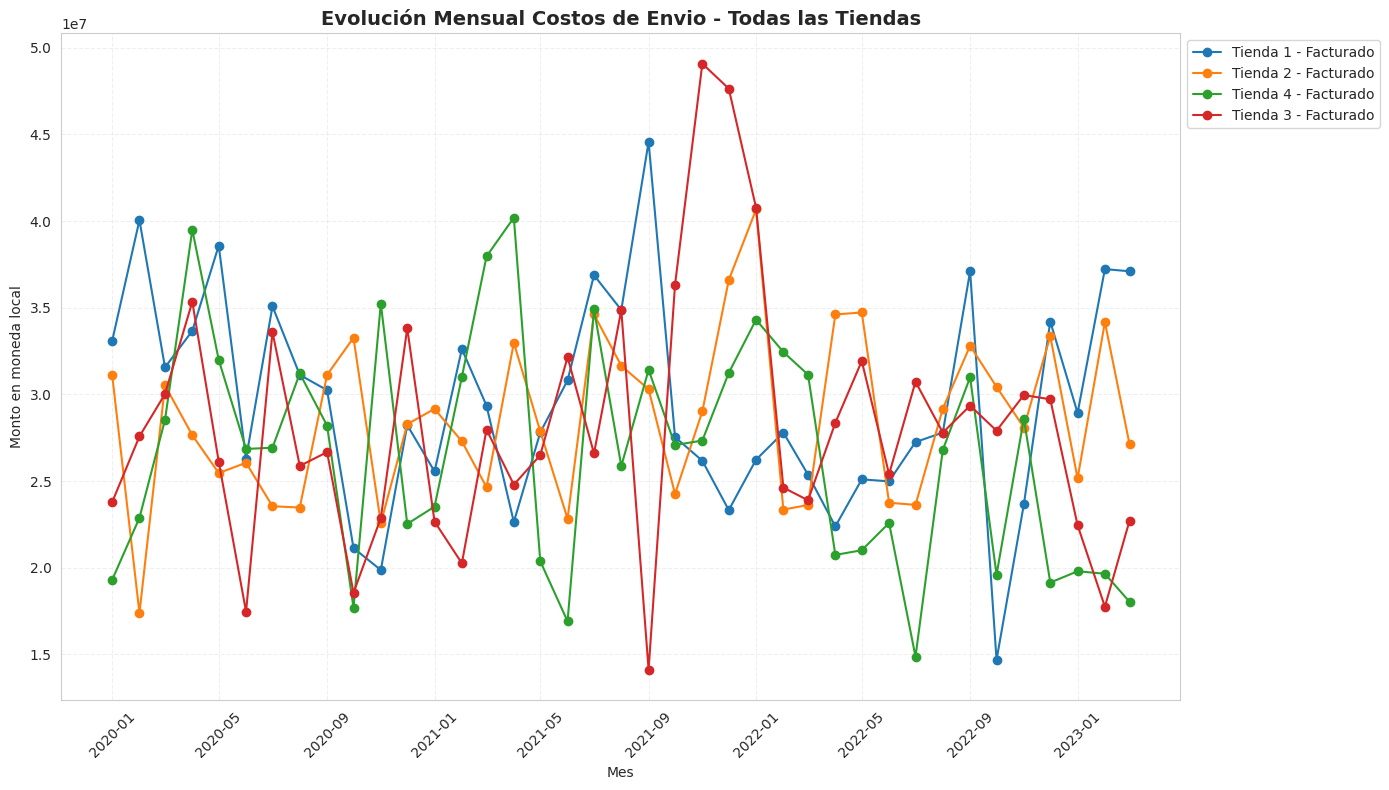

In [ ]:
plt.figure(figsize=(14, 8))
for tienda in df_total['Tienda'].unique():
    df_plot = df_total[df_total['Tienda'] == tienda]
    plt.plot(df_plot['Grupo'], df_plot['Facturado'], marker='o', label=f'{tienda} - Facturado')
   # plt.plot(df_plot['Grupo'], df_plot['CostoEnvio'], marker='x', linestyle='--', label=f'{tienda} - Costo Envío')
    #plt.plot(df_plot['Grupo'], df_plot['Ganancia'], marker='s', linestyle='-.', label=f'{tienda} - Ganancia')

plt.title('Evolución Mensual Costos de Envio - Todas las Tiendas', fontsize=14, fontweight='bold')
plt.xlabel('Mes')
plt.ylabel('Monto en moneda local')
plt.grid(linestyle='--', alpha=0.3)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Asumiendo que df_total ya fue generado y contiene columnas:
# ['Grupo', 'Facturado', 'CostoEnvio', 'Ganancia', 'Tienda']

fig = go.Figure()

# Agregar una línea por cada tienda y métrica
for tienda in df_total['Tienda'].unique():
    df_plot = df_total[df_total['Tienda'] == tienda]

    fig.add_trace(go.Scatter(
        x=df_plot['Grupo'], y=df_plot['Facturado'],
        mode='lines+markers',
        name=f'{tienda} - Facturado',
        line=dict(dash='solid')
    ))

    fig.add_trace(go.Scatter(
        x=df_plot['Grupo'], y=df_plot['CostoEnvio'],
        mode='lines+markers',
        name=f'{tienda} - Costo Envío',
        line=dict(dash='dash')
    ))

    fig.add_trace(go.Scatter(
        x=df_plot['Grupo'], y=df_plot['Ganancia'],
        mode='lines+markers',
        name=f'{tienda} - Ganancia',
        line=dict(dash='dot')
    ))

# Configuración de diseño
fig.update_layout(
    title='📊 Evolución Mensual de Facturación, Costo de Envío y Ganancia - Todas las Tiendas',
    xaxis_title='Mes',
    yaxis_title='Monto en moneda local',
    legend_title='Métrica por Tienda',
    template='plotly_white',
    hovermode='x unified',
    autosize=True,
    margin=dict(l=40, r=20, t=60, b=40)
)

fig.update_xaxes(tickangle=45)

fig.show()

In [ ]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Función auxiliar para agregar la línea de tendencia
def agregar_tendencia(fig, x, y, nombre, estilo='dot', color=None):
    x_ordinal = np.array([d.toordinal() for d in x]).reshape(-1, 1)
    y = np.array(y)
    if len(x_ordinal) >= 2:
        modelo = LinearRegression().fit(x_ordinal, y)
        y_pred = modelo.predict(x_ordinal)
        fig.add_trace(go.Scatter(
            x=x,
            y=y_pred,
            mode='lines',
            name=f'{nombre} (Tendencia)',
            line=dict(dash=estilo, width=2),
            marker=dict(color=color) if color else None,
            showlegend=True
        ))

# Colores por métrica
colores_metricas = {
    'Facturado': '#4D96FF',
    'Costo Envío': '#FFA94D',
    'Ganancia': '#51CF66'
}

# Crear un gráfico por tienda
tiendas = df_total['Tienda'].unique()
for tienda in tiendas:
    df_plot = df_total[df_total['Tienda'] == tienda]
    fig = go.Figure()

    # Agregar cada métrica y su tendencia
    for metrica, estilo in zip(['Facturado', 'CostoEnvio', 'Ganancia'], ['solid', 'dash', 'dot']):
        color = colores_metricas.get(metrica.replace(' ', ''), None)
        fig.add_trace(go.Scatter(
            x=df_plot['Grupo'],
            y=df_plot[metrica],
            mode='lines+markers',
            name=metrica,
            line=dict(dash=estilo),
            marker=dict(color=color)
        ))

        # Tendencia
        agregar_tendencia(fig, df_plot['Grupo'], df_plot[metrica], metrica, estilo=estilo, color=color)

    # Estética del gráfico
    fig.update_layout(
        title=f'📊 Evolución Mensual - {tienda}',
        xaxis_title='Mes',
        yaxis_title='Monto en moneda local',
        template='plotly_white',
        hovermode='x unified',
        legend_title='Métricas',
        margin=dict(l=40, r=20, t=60, b=40)
    )
    fig.update_xaxes(tickangle=45)
    fig.show()


In [ ]:

# Función auxiliar para agregar tendencia de los últimos 6 meses
def agregar_tendencia_ultimos_12_meses(fig, x, y, nombre, estilo='dot', color=None):
    if len(x) >= 12:
        x_6 = x[-12:]
        y_6 = y[-12:]
        x_ordinal = np.array([d.toordinal() for d in x_6]).reshape(-1, 1)
        y_6 = np.array(y_6)
        modelo = LinearRegression().fit(x_ordinal, y_6)
        y_pred = modelo.predict(x_ordinal)

        fig.add_trace(go.Scatter(
            x=x_6,
            y=y_pred,
            mode='lines',
            name=f'{nombre} (Tendencia últimos 12 meses)',
            line=dict(dash=estilo, width=2),
            marker=dict(color=color) if color else None,
            showlegend=True
        ))

# Colores por métrica
colores_metricas = {
    'Facturado': '#4D96FF',
    'CostoEnvio': '#FFA94D',
    'Ganancia': '#51CF66'
}

# Crear un gráfico por tienda
tiendas = df_total['Tienda'].unique()
for tienda in tiendas:
    df_plot = df_total[df_total['Tienda'] == tienda]
    fig = go.Figure()

    # Agregar cada métrica y su tendencia
    for metrica, estilo in zip(['Facturado', 'CostoEnvio', 'Ganancia'], ['solid', 'dash', 'dot']):
        color = colores_metricas.get(metrica, None)
        fig.add_trace(go.Scatter(
            x=df_plot['Grupo'],
            y=df_plot[metrica],
            mode='lines+markers',
            name=metrica,
            line=dict(dash=estilo),
            marker=dict(color=color)
        ))

        # Solo tendencia últimos 6 meses
        agregar_tendencia_ultimos_12_meses(fig, df_plot['Grupo'].tolist(), df_plot[metrica].tolist(), metrica, estilo=estilo, color=color)

    # Estética del gráfico
    fig.update_layout(
        title=f'📊 Evolución Mensual - {tienda}',
        xaxis_title='Mes',
        yaxis_title='Monto en moneda local',
        template='plotly_white',
        hovermode='x unified',
        legend_title='Métricas',
        margin=dict(l=40, r=20, t=60, b=40)
    )
    fig.update_xaxes(tickangle=45)
    fig.show()